定义线性回归模型主体

In [6]:
import numpy as np

# 定义模型主体部分，包括线性回归模型公式、均方损失函数和参数求偏导三部分
def linear_loss(X, y, w, b):
    """
    输入：
    X：输入变量矩阵
    y：标签向量
    w：参数矩阵
    b：偏置
    输出：
    y_hat：线性回归模型预测值
    loss：均方损失
    dw：权重系数一阶偏导
    db：偏置一阶偏导
    """

    num_train, num_feature = X.shape[0], X.shape[1] # 样本数、特征数
    y_hat = np.dot(X, w) + b # 线性回归预测值y_hat
    loss = np.sum((y_hat - y) ** 2) / num_train # y_hat与真实y之间的均方损失
    dw = np.dot(X.T, (y_hat - y)) / num_train # 基于均方损失对权值的一阶梯度
    db = np.sum(y_hat - y) / num_train # 基于均方损失对偏置的一阶梯度
    
    return y_hat, loss, dw, db

初始化模型参数

In [7]:
# 初始化模型参数
def initialize_params(dims):
    """
    输入：
    dims：训练数据变量的维度
    输出：
    w：初始化的权重系数
    b：初始化的偏置
    """

    w = np.zeros((dims, 1)) # 初始化权重系数为零向量
    b = 0
    
    return w, b

定义线性回归模型的训练过程

In [20]:
def linear_train(X, y, learning_rate=0.01, epochs=10000):
    """
    输入：
    X：输入变量矩阵
    y：标签向量
    learning_rate：学习率
    epochs：训练迭代次数
    输出：
    loss_his：每次迭代的均方损失
    params：优化后的参数字典
    grads：优化后的参数梯度字典
    """

    loss_his = [] # 记录训练损失
    w, b = initialize_params(X.shape[1]) # 初始化模型参数
    for i in range(epochs):
        y_hat, loss, dw, db = linear_loss(X, y, w, b) # 计算当前迭代的y_hat、损失、梯度
        w += - learning_rate * dw # 梯度下降更新w
        b += - learning_rate * db # 梯度下降更新b
        loss_his.append((i, loss)) # 记录当前迭代的损失
        if i % 10000 == 0:
            print(f'epoch {i} loss {loss}')
        params = {'w': w, 'b': b} # 当前迭代优化的参数保存到字典
        grads = {'dw': dw, 'db': db} # 当前迭代步的梯度保存到字典

    return loss_his, params, grads

导入数据集

In [18]:
from sklearn.datasets import load_diabetes # 导入diabetes数据集
from sklearn.utils import shuffle # 打乱数据函数
diabetes = load_diabetes() # 获取diabetes数据集
data, target = diabetes.data, diabetes.target # 输入与标签
X, y = shuffle(data, target, random_state=13) # 打乱数据集
offset = int(X.shape[0] * 0.8) # 按照8：2划分为训练集和测试集
X_train, y_train, X_test, y_test = X[:offset], y[:offset], X[offset:], y[offset:]
y_train = y_train.reshape((-1, 1)) # 将训练集改成列向量形式
y_test = y_test.reshape((-1, 1)) # 将测试集改成列向量形式

模型训练

epoch 0 loss 28045.57223796034
epoch 10000 loss 3679.788136114293
epoch 20000 loss 3219.138779296055
epoch 30000 loss 3040.807835697372
epoch 40000 loss 2944.9292487179514
epoch 50000 loss 2885.986899779199
epoch 60000 loss 2848.0487698165666
epoch 70000 loss 2823.1550740145344
epoch 80000 loss 2806.626478474187
epoch 90000 loss 2795.546012527875
训练后得到的模型参数：{'w': array([[  20.45965531],
       [-196.98085671],
       [ 438.55028869],
       [ 276.21015858],
       [ -41.14885488],
       [ -97.58028887],
       [-215.26356221],
       [ 158.67937397],
       [ 374.38648461],
       [  97.07716141]]), 'b': 150.81185325359615}


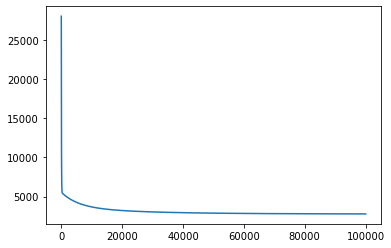

In [22]:
learning_rate, epochs = 0.01, 100000
loss_his, params, grads = linear_train(X_train, y_train, learning_rate, epochs) # 训练
print(f'训练后得到的模型参数：{params}')
from matplotlib import pyplot as plt
epoch, loss = zip(*loss_his)
plt.plot(epoch, loss)

回归模型的预测函数

In [25]:
# 定义线性回归函数的预测函数
def predict(X, params):
    """
    输入：
    X：测试集
    params：模型参数
    输出：
    y_pred：模型预测结果
    """
    
    w, b = params['w'], params['b'] # 模型参数
    y_pred = np.dot(X, w) + b # 预测
    return y_pred

y_pred = predict(X_test, params)
print(f'模型预测结果：{y_pred}')

模型预测结果：[[ 80.26611285]
 [169.94844028]
 [115.79823159]
 [135.88314187]
 [173.40892101]
 [140.72592949]
 [136.06396052]
 [ 95.01392848]
 [178.53043653]
 [144.82065396]
 [240.79079211]
 [218.21006543]
 [227.5585031 ]
 [178.06995465]
 [110.22935299]
 [139.87610805]
 [127.48378523]
 [227.79408881]
 [134.1997035 ]
 [121.57990886]
 [105.44904201]
 [ 96.36123717]
 [210.51621478]
 [160.71929013]
 [246.46391114]
 [118.53959067]
 [214.82857311]
 [148.38330757]
 [187.23809738]
 [172.84841189]
 [121.88429027]
 [161.26832789]
 [170.27281388]
 [238.00485535]
 [196.56215162]
 [ 71.06225623]
 [165.63252906]
 [108.27641402]
 [172.69703647]
 [244.35055784]
 [185.8654987 ]
 [ 69.44868705]
 [210.56265099]
 [204.14327605]
 [115.85829831]
 [156.74589544]
 [136.46541142]
 [102.68950187]
 [141.08960568]
 [160.97013546]
 [162.9546211 ]
 [153.50416632]
 [ 79.24784068]
 [138.50995515]
 [173.36271829]
 [213.71798301]
 [117.52305573]
 [165.79262344]
 [271.8734216 ]
 [ 86.22239607]
 [119.25325377]
 [221.05908319]
 

回归模型R^2系数

In [26]:
# 定义R^2系数
def r2_score(y_test, y_pred):
    """
    输入：
    y_test：标签值
    y_pred：预测值
    输出：
    r2：R^2系数
    """

    y_avg = np.mean(y_test) # 测试集标签均值
    ss_tot = np.sum((y_test - y_avg) ** 2) # 总离差平方和
    ss_res = np.sum((y_test - y_pred) ** 2) # 残差平方和
    r2 = 1 - (ss_res / ss_tot)
    
    return r2

r2 = r2_score(y_test, y_pred)
print(f'R^2系数为{r2}')

R^2系数为0.520879342806108


基于sklearn实现线性回归

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression() # 定义模型
regr.fit(X_train, y_train) # 模型拟合训练数据
y_pred = regr.predict(X_test) # 模型预测
mse = mean_squared_error(y_test, y_pred) # 计算测试数据的均方误差
r2 = r2_score(y_test, y_pred)
print(f'测试集上的均方误差：{mse}')
print(f'测试集上的R^2系数：{r2}')

测试集上的均方误差：3371.884211146165
测试集上的R^2系数：0.5392080506325068
